<a href="https://colab.research.google.com/github/ganjiron/ganpython/blob/master/%EC%8A%A4%ED%84%B0%EB%94%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

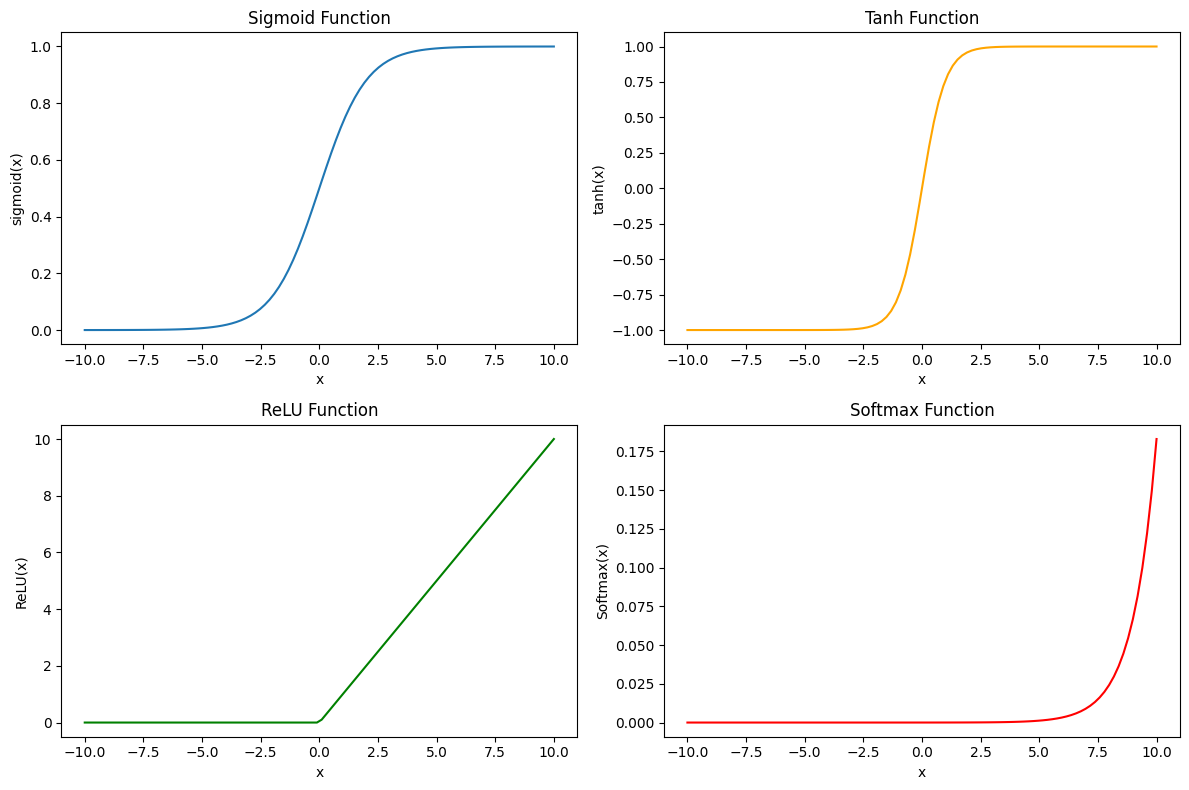

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
x = np.linspace(-10, 10, 100)

# Sigmoid 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh 함수
def tanh(x):
    return np.tanh(x)

# ReLU 함수
def relu(x):
    return np.maximum(0, x)

# Softmax 함수
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# 활성화 함수 적용
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_softmax = softmax(x)

# 그래프 그리기
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, label="Sigmoid")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")

plt.subplot(2, 2, 2)
plt.plot(x, y_tanh, label="Tanh", color='orange')
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")

plt.subplot(2, 2, 3)
plt.plot(x, y_relu, label="ReLU", color='green')
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")

plt.subplot(2, 2, 4)
plt.plot(x, y_softmax, label="Softmax", color='red')
plt.title("Softmax Function")
plt.xlabel("x")
plt.ylabel("Softmax(x)")

plt.tight_layout()
plt.show()

네, 딥러닝에서도 부트스트래핑(bootstrapping)이 가능합니다. 부트스트래핑은 원래 통계학에서 사용되는 용어로, 표본 데이터를 반복적으로 추출하여 (복원 추출) 여러 데이터 세트를 생성하는 방법입니다. 딥러닝에서는 이 방법을 데이터 증강, 모델의 견고성 테스트, 또는 앙상블 학습에 사용할 수 있습니다.

딥러닝에서 부트스트래핑의 예시

1. 데이터 증강

부트스트래핑을 통해 원본 데이터 세트에서 추가적인 훈련 데이터를 생성할 수 있습니다. 예를 들어, 이미지 데이터 세트에서 부트스트래핑을 사용하여 데이터를 증강하는 방법은 다음과 같습니다.

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# 예시 이미지 데이터 세트 (가정)
images = np.array([...])  # 이미지 데이터
labels = np.array([...])  # 레이블 데이터

# 이미지 데이터 증강을 위한 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# 부트스트래핑을 통한 데이터 증강
bootstrapped_images, bootstrapped_labels = [], []
for _ in range(n_bootstrap_samples):
    # 데이터 샘플링 (복원 추출)
    indices = np.random.randint(0, len(images), len(images))
    sampled_images = images[indices]
    sampled_labels = labels[indices]

    # 데이터 증강
    for x, y in datagen.flow(sampled_images, sampled_labels, batch_size=len(sampled_images), shuffle=False):
        bootstrapped_images.append(x)
        bootstrapped_labels.append(y)
        break  # datagen.flow는 무한 루프이므로 한 번만 실행

bootstrapped_images = np.vstack(bootstrapped_images)
bootstrapped_labels = np.hstack(bootstrapped_labels)

2. 앙상블 학습

부트스트래핑을 사용하여 서로 다른 데이터 세트에서 여러 모델을 훈련하고, 이들의 결과를 조합하여 최종 예측을 하는 앙상블 학습도 가능합니다. 예를 들어, 여러 CNN 모델을 각각 부트스트랩된 데이터 세트에서 훈련시키고, 이들의 평균 결과를 사용하는 방법이 있습니다.

In [ ]:
from keras.models import Sequential

# 모델 정의 (예시)
def build_model():
    model = Sequential([...])
    model.compile(...)
    return model

# 부트스트랩된 데이터로 여러 모델 훈련
models = [build_model() for _ in range(n_models)]
for model, (train_images, train_labels) in zip(models, bootstrapped_data):
    model.fit(train_images, train_labels, ...)